In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
podaci = pd.read_csv(r'C:\Users\kundi\Moji_radovi\import_data\OLS_DataFrame.csv')

In [4]:
podaci.rename(columns={'Weight (Kilograms)' : 'Masa_tereta'}, inplace = True)

In [5]:
podaci.rename(columns={'Freight Cost (USD)' : 'Cijena_transporta'}, inplace = True)

In [6]:
podaci.rename(columns={'Pack Price' : 'Cijena_paketa'}, inplace = True)

In [7]:
podaci

,Country,Managed By,Shipment Mode,Vendor,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Cijena_paketa,Unit Price,Masa_tereta,Cijena_transporta
0,C�te d'Ivoire,PMO - US,Air,RANBAXY Fine Chemicals LTD.,30,19,551.00,29.00,0.97,13,780.34
1,Vietnam,PMO - US,Air,Aurobindo Pharma Limited,240,1000,6200.00,6.20,0.03,358,4521.5
2,C�te d'Ivoire,PMO - US,Air,Abbott GmbH & Co. KG,100,500,40000.00,80.00,0.80,171,1653.78
3,Vietnam,PMO - US,Air,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,60,31920,127360.80,3.99,0.07,1855,16007.06
4,Vietnam,PMO - US,Air,Aurobindo Pharma Limited,60,38000,121600.00,3.20,0.05,7590,45450.08
...,...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,Truck,SCMS from RDC,60,166571,599655.60,3.60,0.06,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920)
10320,C�te d'Ivoire,PMO - US,Truck,SCMS from RDC,60,21072,137389.44,6.52,0.11,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921)
10321,Zambia,PMO - US,Truck,SCMS from RDC,30,514526,5140114.74,9.99,0.33,Weight Captured Separately,Freight Included in Commodity Cost
10322,Zimbabwe,PMO - US,Truck,SCMS from RDC,60,17465,113871.80,6.52,0.11,1392,Freight Included in Commodity Cost


In [8]:
podaci.drop(columns=['Vendor', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Unit Price'], inplace = True)

In [9]:
podaci

,Country,Managed By,Shipment Mode,Cijena_paketa,Masa_tereta,Cijena_transporta
0,C�te d'Ivoire,PMO - US,Air,29.00,13,780.34
1,Vietnam,PMO - US,Air,6.20,358,4521.5
2,C�te d'Ivoire,PMO - US,Air,80.00,171,1653.78
3,Vietnam,PMO - US,Air,3.99,1855,16007.06
4,Vietnam,PMO - US,Air,3.20,7590,45450.08
...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,Truck,3.60,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920)
10320,C�te d'Ivoire,PMO - US,Truck,6.52,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921)
10321,Zambia,PMO - US,Truck,9.99,Weight Captured Separately,Freight Included in Commodity Cost
10322,Zimbabwe,PMO - US,Truck,6.52,1392,Freight Included in Commodity Cost


In [10]:
podaci.Masa_tereta = pd.to_numeric(podaci['Masa_tereta'], errors = 'coerce')
podaci.Cijena_transporta = pd.to_numeric(podaci['Cijena_transporta'], errors='coerce')
podaci['Masa_tereta'].fillna(podaci['Masa_tereta'].mean(), inplace = True)
podaci['Cijena_transporta'].fillna(podaci['Cijena_transporta'].mean(), inplace = True)

In [11]:
podaci

,Country,Managed By,Shipment Mode,Cijena_paketa,Masa_tereta,Cijena_transporta
0,C�te d'Ivoire,PMO - US,Air,29.00,13.000000,780.340000
1,Vietnam,PMO - US,Air,6.20,358.000000,4521.500000
2,C�te d'Ivoire,PMO - US,Air,80.00,171.000000,1653.780000
3,Vietnam,PMO - US,Air,3.99,1855.000000,16007.060000
4,Vietnam,PMO - US,Air,3.20,7590.000000,45450.080000
...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,Truck,3.60,3172.574211,11103.234819
10320,C�te d'Ivoire,PMO - US,Truck,6.52,3172.574211,11103.234819
10321,Zambia,PMO - US,Truck,9.99,3172.574211,11103.234819
10322,Zimbabwe,PMO - US,Truck,6.52,1392.000000,11103.234819


In [12]:
nova_cijena_transporta = []
for i in range(len(podaci['Cijena_transporta'])):
    if podaci['Cijena_transporta'][i] >1 and podaci['Cijena_transporta'][i] <80000:
        nova_cijena_transporta.append(podaci['Cijena_transporta'][i]) 
    else:
        nova_cijena_transporta.append(podaci['Cijena_transporta'].mean())

In [13]:
nova_masa_tereta = []
for i in range(len(podaci['Masa_tereta'])):
    if podaci['Masa_tereta'][i] > 1 and podaci['Masa_tereta'][i] < 45000:
        nova_masa_tereta.append(podaci['Masa_tereta'][i]) 
    else:
        nova_masa_tereta.append(podaci['Masa_tereta'].mean())

In [14]:
podaci.Masa_tereta = nova_masa_tereta

In [15]:
podaci.Cijena_transporta = nova_cijena_transporta

In [16]:
podaci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            10324 non-null  object 
 1   Managed By         10324 non-null  object 
 2   Shipment Mode      9964 non-null   object 
 3   Cijena_paketa      10324 non-null  float64
 4   Masa_tereta        10324 non-null  float64
 5   Cijena_transporta  10324 non-null  float64
dtypes: float64(3), object(3)
memory usage: 484.1+ KB


In [17]:
podaci.describe()

,Cijena_paketa,Masa_tereta,Cijena_transporta
count,10324.000000,10324.000000,10324.000000
mean,21.910241,3002.697129,10550.054887
std,45.609223,3925.317516,9221.139038
min,0.000000,2.000000,14.360000
25%,4.120000,631.000000,4327.657500
50%,9.300000,3172.574211,11103.234819
75%,23.592500,3172.574211,11103.234819
max,1345.640000,43571.000000,79938.080000


In [18]:
podaci.shape

(10324, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x16d107afee0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d107af880>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d108c7c40>],
 'medians': [<matplotlib.lines.Line2D at 0x16d1090c190>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d1090c5e0>],
 'means': []}

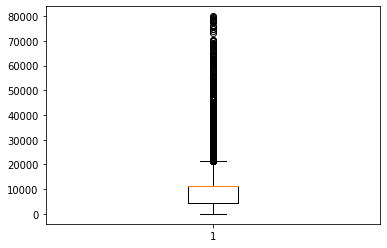

In [19]:
plt.boxplot(podaci['Cijena_transporta'])

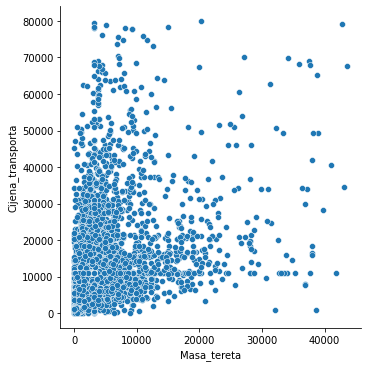

In [20]:
sns.relplot(x = 'Masa_tereta', y = 'Cijena_transporta', data = podaci)

<AxesSubplot:>

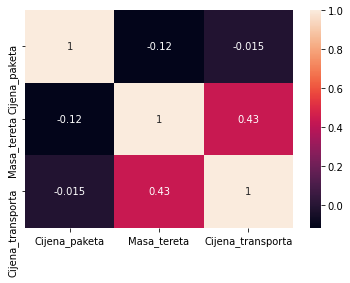

In [21]:
sns.heatmap(podaci.corr(), annot = True)

In [22]:
podaci.columns

Index(['Country', 'Managed By', 'Shipment Mode', 'Cijena_paketa',
       'Masa_tereta', 'Cijena_transporta'],
      dtype='object')

In [23]:
mod = podaci.copy()
mod.set_index('Shipment Mode', inplace=True)

In [24]:
mod.head()

,Country,Managed By,Cijena_paketa,Masa_tereta,Cijena_transporta
Shipment Mode,,,,,
Air,C�te d'Ivoire,PMO - US,29.00,13.0,780.34
Air,Vietnam,PMO - US,6.20,358.0,4521.50
Air,C�te d'Ivoire,PMO - US,80.00,171.0,1653.78
Air,Vietnam,PMO - US,3.99,1855.0,16007.06
Air,Vietnam,PMO - US,3.20,7590.0,45450.08


In [25]:
air = mod.loc['Air']
aircharter = mod.loc['Air Charter']
truck = mod.loc['Truck']
ship = mod.loc['Ocean']

In [26]:
aircharter

,Country,Managed By,Cijena_paketa,Masa_tereta,Cijena_transporta
Shipment Mode,,,,,
Air Charter,Nigeria,PMO - US,11.40,506.000000,22985.720000
Air Charter,Nigeria,PMO - US,11.40,3415.000000,15128.370000
Air Charter,Nigeria,PMO - US,26.25,235.000000,15128.370000
Air Charter,Nigeria,PMO - US,9.72,3364.000000,7329.830000
Air Charter,Nigeria,PMO - US,11.40,610.000000,11103.234819
...,...,...,...,...,...
Air Charter,Nigeria,PMO - US,4.61,3172.574211,11103.234819
Air Charter,Nigeria,PMO - US,18.64,3232.000000,4495.290000
Air Charter,Nigeria,PMO - US,3.60,3172.574211,11103.234819


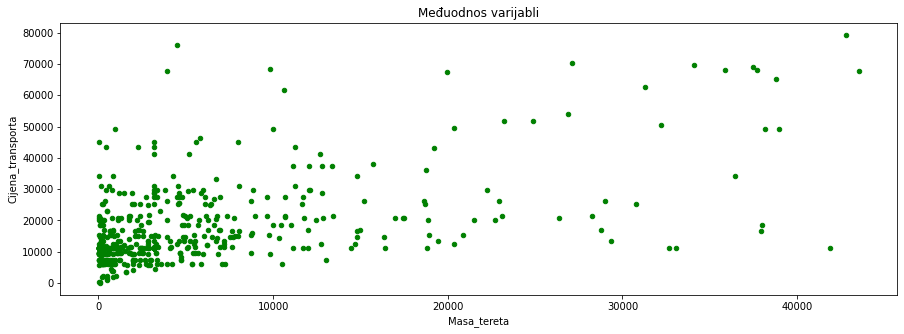

In [27]:
aircharter.plot(kind='scatter', x = 'Masa_tereta' , y= 'Cijena_transporta', color='g', figsize=(15,5))  
plt.title('Međuodnos varijabli')
plt.show()

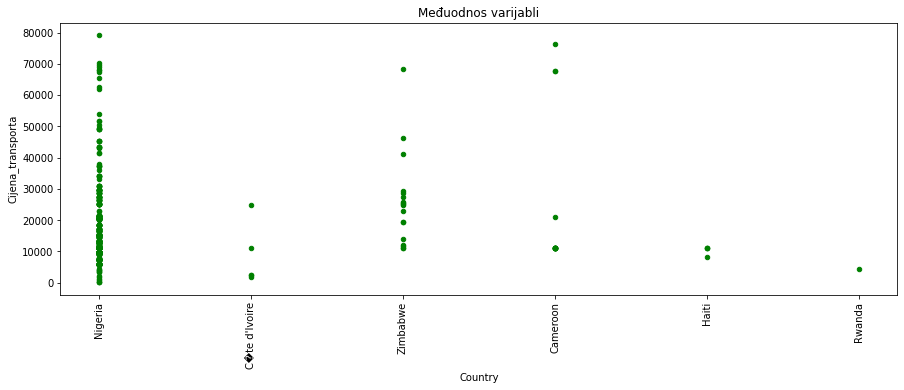

In [28]:
# USPOREDBA DVAJU VARIJABLI IZ SKUPA
aircharter.plot(kind='scatter', x = 'Country' , y= 'Cijena_transporta', color='g',figsize=(15,5))  
plt.title('Međuodnos varijabli')
plt.xticks(rotation=90)
plt.show()

In [29]:
X = aircharter['Masa_tereta']
y = aircharter['Cijena_transporta']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

<function matplotlib.pyplot.show(close=None, block=None)>

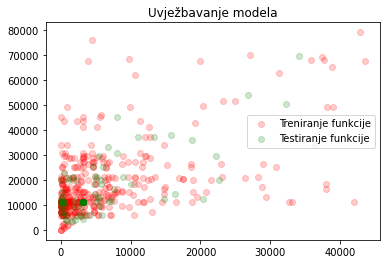

In [31]:
plt.scatter(X_train, y_train, label = 'Treniranje funkcije', color = 'r', alpha=.2)
plt.scatter(X_test, y_test, label = 'Testiranje funkcije', color = 'g', alpha=.2)
plt.legend()
plt.title('Uvježbavanje modela')
plt.show

In [32]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

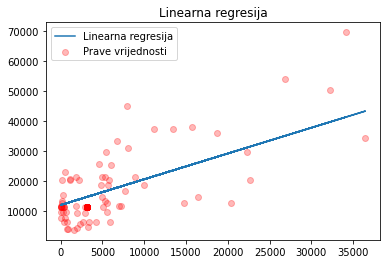

In [39]:
prediction = LR.predict(X_test.values.reshape(-1,1))
plt.plot(X_test, prediction, label = 'Linearna regresija',)
plt.scatter(X_test, y_test, label = 'Prave vrijednosti', color = 'r', alpha=0.28)
plt.legend()
plt.title('Linearna regresija')
plt.show()

In [40]:
#PREDIKCIJA ZAVISNE VARIJABLE AKO SE UNESE NEZAVISNA
LR.predict(np.array([[8300]]))[0]

19073.298077557447

In [41]:
#EVALUACIJA USPJEŠNOSTI MODELA
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.5100544708154109